# Basic Statistics

- [Sample(Выборка)](#Sample(Выборка))
- [Frequency histogram(Гистограмма частот)](#Frequency-histogram(Гистограмма-частот))
- [Measures of central tendency(Меры центральной тенденции)](#Measures-of-central-tendency(Меры-центральной-тенденции))
- [Range(Размах)](#Range(Размах))
- [Variance(Дисперсия)](#Variance(Дисперсия))
- [Standard Deviation(Среднеквадратическое отклонение)](#Standard-Deviation(Среднеквадратическое-отклонение))


- [Box plot](#Box-plot)
- [Normalaized z-score](#Normalaized-z-score)
- [Three Sigma Rule](#Three-Sigma-Rule)
- [Central Limit Theorem](#Central-Limit-Theorem)
- [Confidence Intervals](#Confidence-Intervals)
- [Fisher’s F distribution](#Fisher’s-F-distribution)
- [ANOVA](#ANOVA)


- [Covariance](#Covariance)

Check out [Christopher Fonnesbeck - Introduction to Statistical Modeling with Python - PyCon 2017](https://www.youtube.com/watch?v=TMmSESkhRtI)

In [5]:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline
matplotlib.style.use('fivethirtyeight')
rng = np.random.RandomState(201908)

## Sample(Выборка)

- Simple randome sample(Простая случайная выборка)
- Stratified sample(Стратифицированная выборка)
- Cluster sample(Групповая выборка)

In [428]:
n = 500; x, y = rng.rand(2, n)
r = rng.randint(0, n, int(n/10))
x1 = [x[i] for i in r]; y1 = [y[i] for i in r]

In [429]:
ssx = [a for b in x1 for a in rng.uniform(b-.05, b+.05, 10)]
ssy = [a for b in y1 for a in rng.uniform(b-.05, b+.05, 10)]

rx2 = rng.choice(r, int(n/100)); csx = [x[i] for i in rx2]; csy = [y[i] for i in rx2]
newcsx = [a for b in csx for a in rng.uniform(b-.05, b+.05, 10)]
newcsy = [a for b in csy for a in rng.uniform(b-.05, b+.05, 10)]

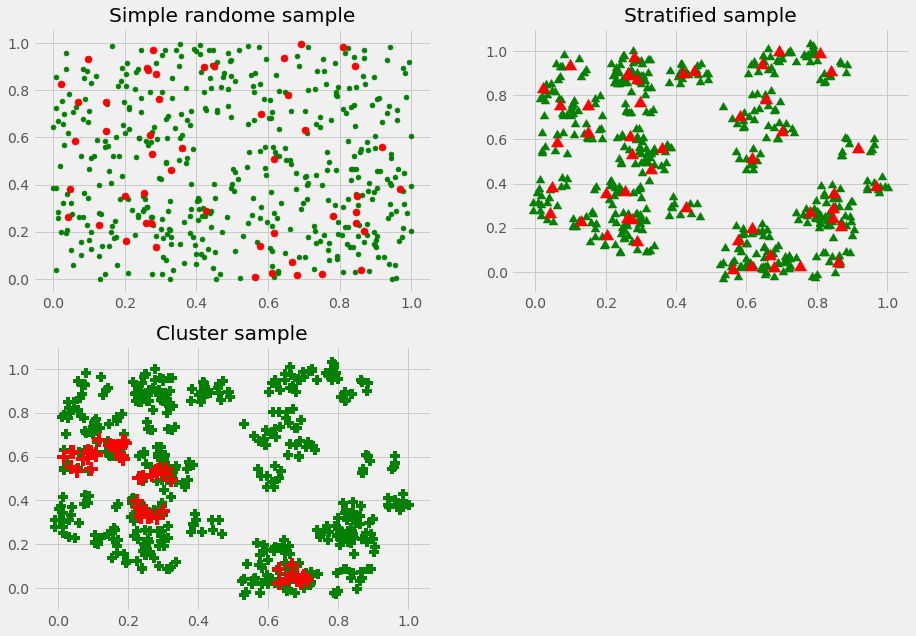

In [430]:
f = plt.figure(figsize=(14,10))

ax1 = f.add_subplot(221)
ax1.title.set_text('Simple randome sample')
ax1.scatter(x, y, s=100, c='green', marker=".")
ax1.scatter(x1, y1, s=200, c='red', marker='.')

ax2 = f.add_subplot(222)
ax2.title.set_text('Stratified sample')
ax2.scatter(ssx, ssy, s=100, c='green', marker=(3, 0))
ax2.scatter(x1, y1, s=200, c='red', marker=(3, 0))

ax3 = f.add_subplot(223)
ax3.title.set_text('Cluster sample')
ax3.scatter(ssx, ssy, s=100, c='green', marker='+')
ax3.scatter(newcsx, newcsy, s=200, c='red', marker='+')
plt.show()

## Frequency histogram(Гистограмма частот)

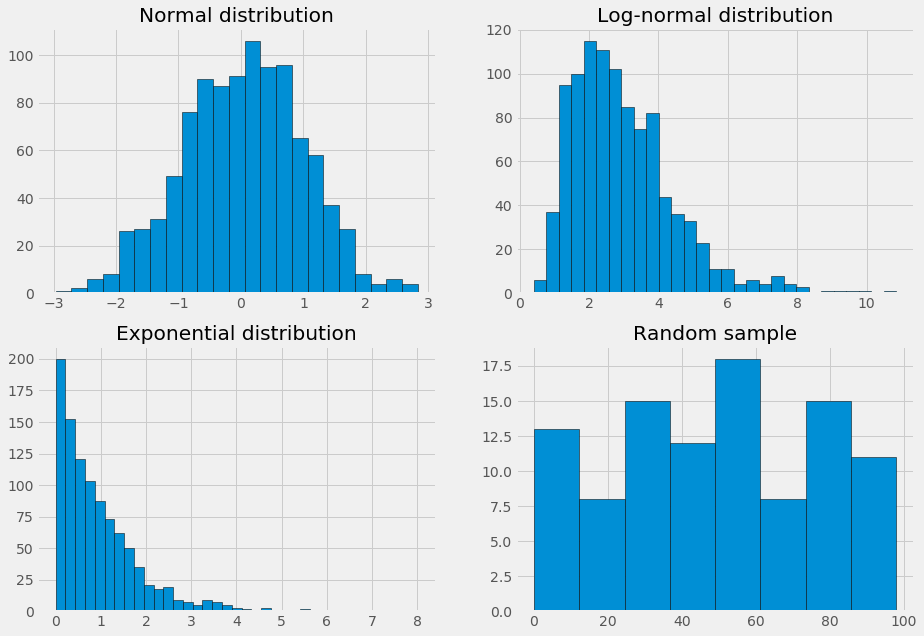

In [434]:
f = plt.figure(figsize=(14,10))

ax1 = f.add_subplot(221)
ax1.title.set_text('Normal distribution')
ax1.hist(rng.normal(size=1000), bins='auto', edgecolor='black')

ax2 = f.add_subplot(222)
ax2.title.set_text('Log-normal distribution')
ax2.hist(rng.lognormal(1., .5, 1000), bins='auto', edgecolor='black')

ax3 = f.add_subplot(223)
ax3.title.set_text('Exponential distribution')
ax3.hist(rng.exponential(1.0, 1000), bins='auto', edgecolor='black')

ax3 = f.add_subplot(224)
ax3.title.set_text('Random sample')
ax3.hist(rng.randint(0,100,100), bins='auto', edgecolor='black')

plt.show()

## Measures of central tendency(Меры центральной тенденции)

[Central tendency Wikipedia article](https://en.wikipedia.org/wiki/Central_tendency)

Random integer sample: 89 99 0 28 10 21 56 26 91 12 71 92 21 42 31 15 20 54 19 0 18 55 93 41 89 7 8 50 15 0 40 91 20 4 15 84 45 97 91 98 45 87 94 13 84 19 20 37 36 74
Mean:45 Median:38


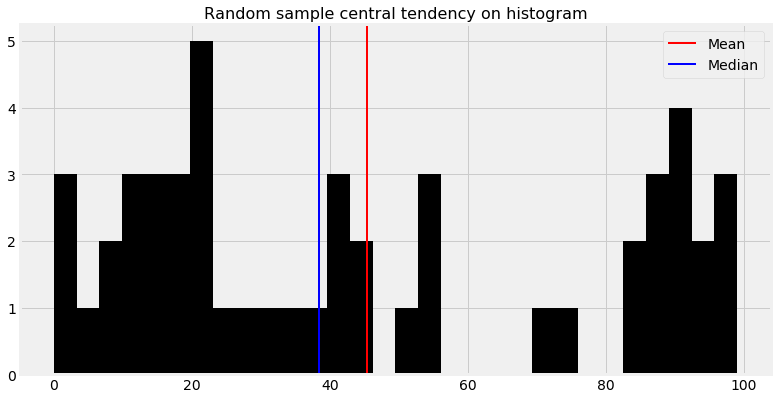

In [91]:
sample = rng.randint(0,100,50)
print("Random integer sample:", *sample)
print(f"Mean:{int(np.mean(sample))} Median:{int(np.median(sample))}")
fig, ax = plt.subplots(figsize=(12,6), facecolor='white')
ax.hist(sample, 30, histtype='bar', color='black', linewidth=4)
ax.axvline(np.mean(sample), color='red', linewidth=2, label='Mean')
ax.axvline(np.median(sample), color='blue', linewidth=2, label='Median')
ax.set_title('Random sample central tendency on histogram', fontdict={'size':16})
ax.legend()
plt.show()

## Range(Размах)
The range gives a measure of how spread apart the values are.
The range is simply calculated as the maximum value – minimum value.

Numpy implements this as a point to point function np.ptp.

In [92]:
print(f'Max:{sample.max()} Min:{sample.min()} Range:{np.ptp(sample)}')

Max:99 Min:0 Range:99


## Variance(Дисперсия)
The variance is the average of the squared deviations from the mean, i.e., var = mean(abs(x - x.mean())**2)

Numpy implements the variance as a function np.var()

In [93]:
print(f'Variance:{np.var(sample)}')

Variance:1099.2644


## Standard Deviation(Среднеквадратическое отклонение)
The variance can get very large for large data sets and so we will often use the standard deviation, which is the square root of the variance:
68.2% of the data falls within 1 standard deviation of the mean, 95.4% falls within 2 standard deviations of the mean, and 99.7% falls within 3 standard deviations.

This is implemented in Numpy as np.std()

In [94]:
print(f'Standard Deviation:{np.std(sample)}')

Standard Deviation:33.15515646170291


## Box plot

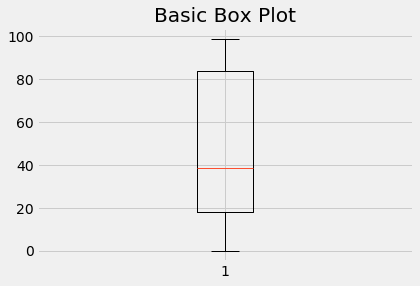

In [95]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Box Plot')
ax1.boxplot(sample)
plt.show()

## Normalaized z-score

(M = 0, sd = 1)

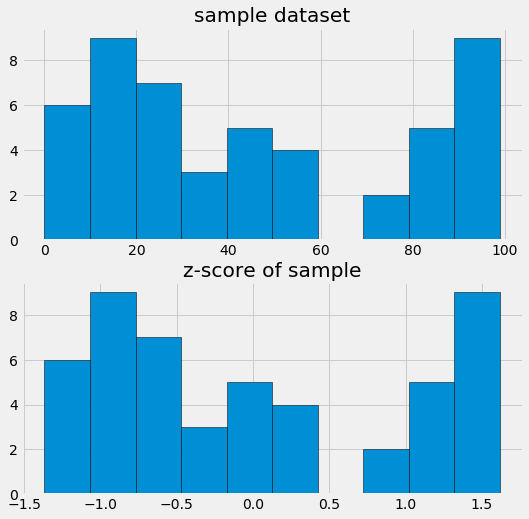

In [102]:
f = plt.figure(figsize=(8,8))

ax1 = f.add_subplot(211)
ax1.title.set_text('sample dataset')
ax1.hist(sample, edgecolor='black')

ax3 = f.add_subplot(212)
ax3.title.set_text('z-score of sample')
ax3.hist(stats.zscore(sample), edgecolor='black')

plt.show()

## Three Sigma Rule

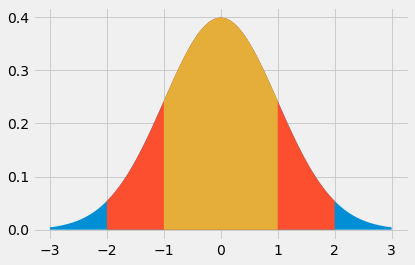

In [11]:
mu = 0
variance = 1
sigma = np.sqrt(variance)
for i in range(3,0,-1):
    x = np.linspace(mu - i*sigma, mu + i*sigma, 100)
    plt.fill_between(x,stats.norm.pdf(x, mu, sigma))
plt.show()

## Central Limit Theorem

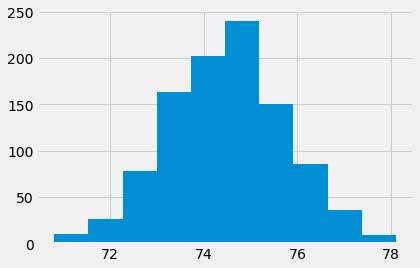

The mean of the sample means is 74.51076


In [98]:
means = [np.mean(rng.randint(60, 90, 50)) for _i in range(1000)]
plt.hist(means)
plt.show()
print(f'The mean of the sample means is {np.mean(means)}')

We’are going to use the [Shapiro-Wilk normality test](https://www.itl.nist.gov/div898/handbook/prc/section2/prc213.htm), where the hypotheses are:
H0: data follow a Normal distribution
H1: data do not follow a Normal distribution

In [99]:
stat, p = stats.shapiro(means)
print('Statistics={}, p={}'.format(stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Normal (do not reject H0)')
else:
    print('Sample does not look Normal (reject H0)')

Statistics=0.9987353086471558, p=0.7122307419776917
Sample looks Normal (do not reject H0)


## Confidence Intervals

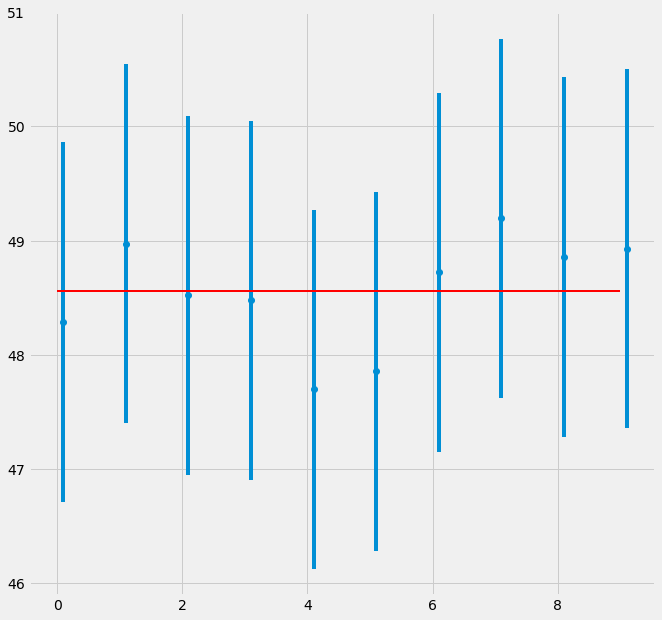

In [155]:
population = rng.randint(0,100,1000)
sample_size = 900

intervals = []
sample_means = []

for sample in range(10):
    sample = np.random.choice(a= population, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.95)  # Get the z-critical value*         

    pop_stdev = population.std(ddof = 1)  # Get the population standard deviation

    stats.norm.ppf(q = 0.05)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

plt.figure(figsize=(10,10))

plt.errorbar(x=np.arange(0.1, 10, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=9,
           y=population.mean(), 
           linewidth=2.0,
           color="red")

plt.show()

## Fisher’s F distribution

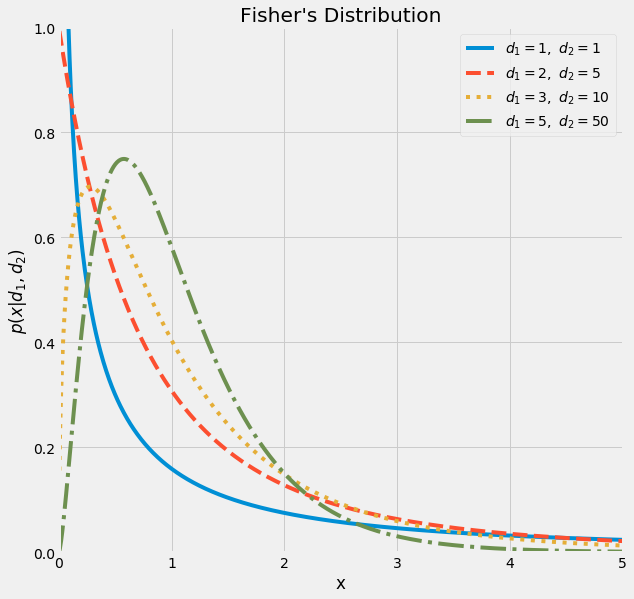

In [166]:
mu = 0
d1_values = [1, 2, 3, 5]
d2_values = [1, 5, 10, 50]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(0, 5, 1000)[1:]

fig, ax = plt.subplots(figsize=(9, 9))

for (d1, d2, ls) in zip(d1_values, d2_values, linestyles):
    dist = stats.f(d1, d2, mu)

    plt.plot(x, dist.pdf(x), ls=ls, label=r'$d_1=%i,\ d_2=%i$' % (d1, d2))

plt.xlim(0, 5)
plt.ylim(0, 1)

plt.xlabel('x')
plt.ylabel(r'$p(x|d_1, d_2)$')
plt.title("Fisher's Distribution")

plt.legend()
plt.show()

## ANOVA

An **Analysis of Variance Test** or an **ANOVA** is a generalization of the t-tests to more than 2 groups. Our null hypothesis states that there are equal means in the populations from which the groups of data were sampled. More succinctly:

μ1=μ2=...=μn for n groups of data. 

Our alternative hypothesis would be that any one of the equivalences in the above equation fail to be met.

In general it is a way to test difference in variance between two or more levels/factors/variants/treatments.

*One-Way*\
[ANOVA with 1 independent variable and 2 treatments.](https://nekrasovp.bitbucket.io/testing-hypothesis-on-football-data-set.html#ANOVA)

*Two-Way*\
[ANOVA with 2 or more independent variables and 2 or more treatments.](https://nekrasovp.bitbucket.io/testing-hypothesis-on-football-data-set.html#ANOVA)

## Covariance

https://en.wikipedia.org/wiki/Covariance

https://en.wikipedia.org/wiki/Cauchy-Schwarz_inequality

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [23]:
import pandas as pd
import seaborn

In [24]:
df2 = pd.DataFrame({'X':[4, 5, 2, 3, 1], 
                    'Y':[2, 1, 4, 3, 5]} ) 
df2.corr(method='pearson')

X    Y
X  1.0 -1.0
Y -1.0  1.0

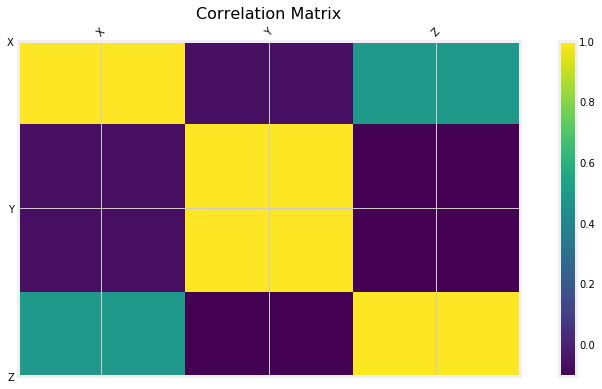

In [38]:
df = pd.DataFrame({'X':rng.rand(10),
                   'Y':rng.rand(10),
                   'Z':rng.rand(10)})

f = plt.figure(figsize=(14, 6))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=16);

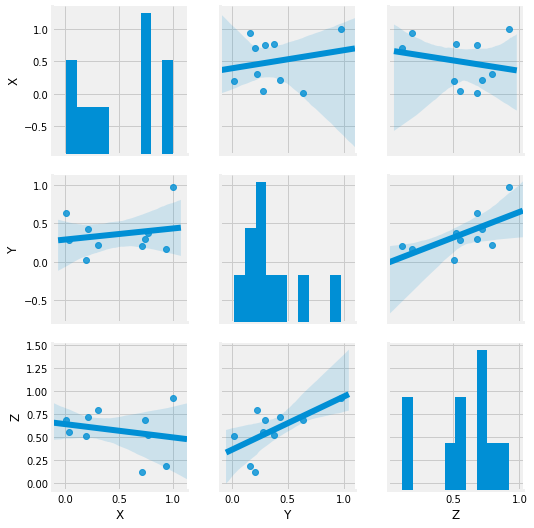

In [35]:
seaborn.pairplot(df, vars=['X', 'Y', 'Z'],
                 kind='reg')  

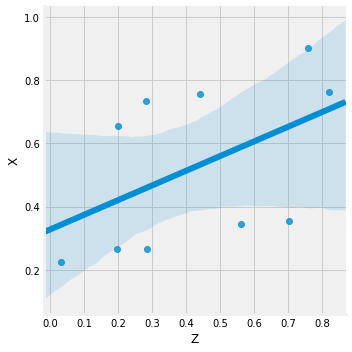

In [39]:
seaborn.lmplot(y='X', x='Z', data=df) 